Jonah Librande

Lab 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as pp

def chadMe(simp, signal):
    chad = np.zeros(simp.size)
    for i in range(chad.size):
        if i < numale.size:
            chad[i] = np.add(simp[i], numale[i])
        else:
            chad[i] = simp[i]
    return chad

# Problem 1

We know how to find a 5-sigma threshhold. We define the probability of an event to be the likelihood that the assumed background (which is in this case the Poisson of mean 100) generates an event as or more signal like, and we define events of larger measurement values to be more signal like -- if we count more particles in a given event, we think of that as being more remarkable than less. We then have that the 5-sigma threshhold will be the event value with a probability equal the probability of finding a value further than 5 sigma to the right of the mean in a normal distribution, which is the area under the tail of the normal to the right of the 5 sigma value, assuming the distribution to be normalized. We calculate this below:

In [2]:
sig = pp.norm.cdf(5)
print('We find a threshhold value of {} events.'.format(str(pp.poisson.ppf(sig, 100))))

We find a threshhold value of 154.0 events.


# Problem 2a and 2b

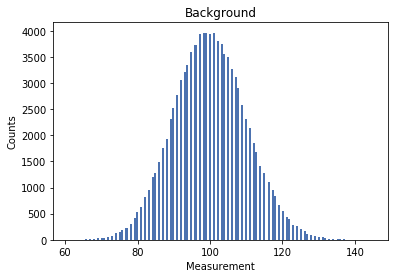

In [33]:
simp = pp.poisson.rvs(100, size=100000)
plt.hist(simp, bins=150)
plt.title('Background')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

Now, we generate a signal. The signal will also be a counting of particle events, which is inherently discrete, and then must be Poisson distributed. The machine epsilon of my computer is garbage, such that it cannot even calculate what the 10 sigma threshhold value is -- it rounds off somewhere and tells me it is infinity. So, due to hardware limitations, I just choose a value of 250 for the mean of the Poisson-distributed signal, which is definitely over the 10 sigma threshhold. To inject it in to the background, we sample the signal, and then impose the sampled events over events from the background. I show the sample from the background with the sample from the signal so that the change in the next step is more dramatic.

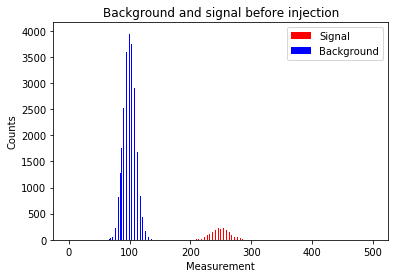

In [47]:
plt.cla()
signal = 250
n = 8526
numale = pp.poisson.rvs(signal, size=n)
plt.hist([numale, simp], bins = np.linspace(0, 500, 499), color=['r', 'b'], label=['Signal', 'Background'])
plt.title('Background and signal before injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.legend()
plt.show()

We observe what we expect: the signal follows a Poisson distribution of mean 250. It has not overlap with the background, that is, there appear to be no measurement values common to both the background and the signal. When we inject, the strange behavior is that the qualitative features of the graph remain the same, but the mean of the blob we recognize as the signal moves!

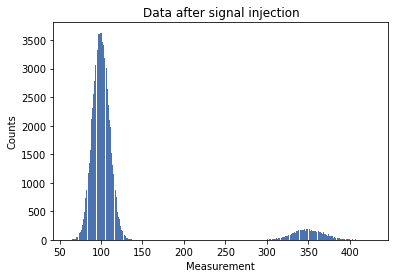

In [42]:
plt.cla()
# Inject the signal
chad = chadMe(simp, numale)
plt.hist(chad, bins = 400)
plt.title('Data after signal injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The mean has moved from 250 to 350. The distance it has moved to the right, 100, is exactly the mean of the background distribution, and this is no coincidence. On average, the background produces 100 particle events, so if on average the signal, independent of the background, produces 250 particle events, then of course since both events are happening at the same time, the overall number of observed particles in an average signal event, when we take the background into account, will be the sum of the particles from the background plus the particles from the signal, which on average is going to be 250 + 100 = 350. So it makes perfect sense that the mean moved 100 units to the right for the signal. It retained its shape as a Poisson distribution because the sum of Poisson distributions is a Poisson distribution, naturally. The net effect of all of this is that the observed measurement is not a measurement of the signal, but a measurement of the signal plus background, so that the overall measurement is greater than a measurement of just the background.

# Problem 3a

We seek to construct a historgram as in the previous part for a wide range of signal strengths, and by signal strength, we refer to the sigma of the mean of the signal, with a larger sigma corresponding to a stronger signal. We note from the previous part that the effect of injecting the signal into the background had the effect of shifting the signal to the right by the mean of the background. This is in fact the only sensible outcome; injecting into the background is just adding the signal and background distributions. Thus, as the sum of two Poisson random variables of means $\mu_1$ and $\mu_2$, we observe that the resultant random variable will also be Poisson of mean $\mu_1 + \mu_2$, a fact known from elementary probability theory. This allows us to save some computational resources, see below. We only need sample from the background, and then the effect of injecting in the background would just be on average translating the resultant sample without changing the overall shape. We can then just sample the background and translate by the mean of the sample signal of interest, which we do so below.

What we are in effect doing is then sampling the injection of a variable strength signal into the background, and then graphing it against the known sample strength, for a wide range of signal strengths.

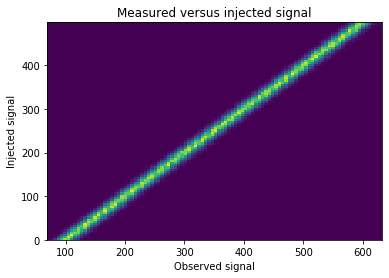

In [31]:
n = 100
inj = np.array([])
obs = np.array([])

sigs = range(500)
for i in sigs:
    beta = pp.poisson.rvs(100, size=n * 2)
    for j in beta: # Nested for loops because I have lost my fear of God.
        inj = np.append(inj, i)
        obs = np.append(obs, j + i)

plt.hist2d(obs, inj, bins = n)
plt.title('Measured versus injected signal')
plt.xlabel('Observed signal')
plt.ylabel('Injected signal')
plt.show()

# Problem 3b

To check that this agrees with the previous result, we just sample from the background some sizeable number of times, and then add to each sampled value the mean of the signal we had in the previous part, 250. We see:

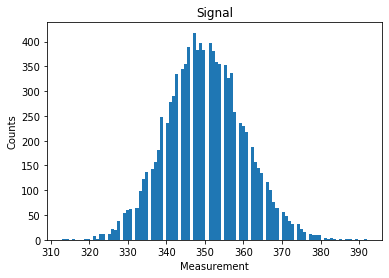

In [30]:
a = pp.poisson.rvs(100, size = 10000)
b = np.array([])
sign = 250
for i in a:
    b = np.append(b, i + sign)
    
plt.hist(b, bins = 100)
plt.title('Total counts (background plus signal)')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The above is a Poisson total counts distribution centered at 350, which is exactly what we had before after injecting our signal of identical mean. So we are in agreement.

# Problem 3c

We now want to deduce from the observed signal what the original injected signal was. This is straightforwards: once we know that the observed and injected signals only differ by some affine offset of the background mean from one another (see the discussion of the effect of adding Poisson random variables above), we can just sample from some total count distribution, and then subtract off the background mean to get the approximate signal distribution. We choose a value of a total observed count mean of, say, 300, and then graph what the resultant signal looks like, after we subtract off the background.

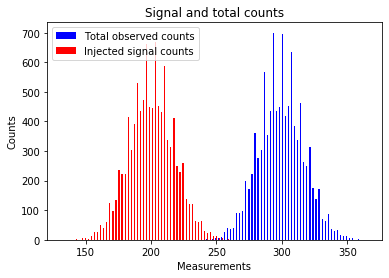

In [64]:
totMean = 300
bgMean = 100
sam = pp.poisson.rvs(totMean, size=10000)
pl = np.array([])
for i in sam:
    pl = np.append(pl, i - bgMean)
    
plt.hist([sam, pl], bins = 100, color=['b', 'r'], label=['Total observed counts', 'Injected signal counts'])
plt.title('Signal and total counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

As noted before, the injected counts are the counts we would see if the background were not there -- these are the counts attributable to the signal alone, without the background. To get the pdf from this, we normalize the distribution, which is done below. One alternative that one may consider for this particular scenario is to note that we know the exact form the true distribution ought to take, which is a Poisson distribution with a mean at 200, so we could just write down the known distribution and call that our pdf. However, we will not do so, as this method is not always tenable --  just look at problem 4. Instead, we will treat our sample as defining our pdf, so as to stick closer to the real world scenario of not knowing our exact background distribution a priori.

# Problem 3d and 3e

Given this distribution of data counts, we can normalize it to obtain a probability distribution. We then may integrate it symmetrically out from its center of 200, stopping once we hit a probability of 1 sigma. Do so:

In [65]:
s1 = pp.norm.cdf(1)
N = pl.size
r = 1
p = 0
while p < s1:
    p = 0
    for i in pl:
        if (i <= r + 200) and (i >= -r + 200):
            p += (1 / N)
    r += 1
print('We integrated up to a distance of {} units from the mean.'.format(r))

We integrated up to a distance of 25 units from the mean.


I claim this range we integrated over gives the range of our 1 sigma uncertainty in the signal strength. To see this, observe that our sample is large enough to be practically representative of the true signal; the probability that the true signal give a data point outside of our range is practically zero. This is the assumption made when we normalize our data and claim it to be a distribution. Next, this means we are assuming the true signal mean will lie somewhere among these values. Then, the fraction of all values of the distribution contained within some range ought to give the probability that the true mean lies in the range. So, we integrate on the distribution until we hit a 1 sigma probability to get a range that we are 1 sigma certain will contain the true mean. Note we made the assumption (to ease calculations) that the true distribution is approximately symmetric in this case, which we know to be true here, as we are dealing with Poisson distributions. This allowed us to integrate symmetrically outwards on the distribution from the mean. We also were able to deduce the mean of this particular signal exactly from previous parts, but in general, we would need to calculate the exact mean. Integrating out from the mean may also not be symmetric in all cases, but as there is a possibility the true signal strength lies above or below the mean here, and we know the signal to be symmetric here, then we can integrate symmetrically outwards from our known mean.

# Problem 4a

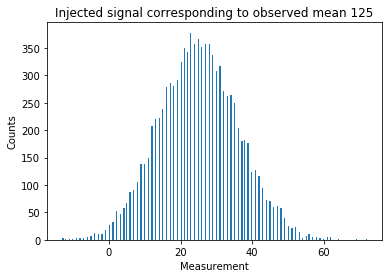

In [66]:
wsig = 125
weak = pp.poisson.rvs(wsig, size=10000)
bpild = np.array([])
for w in weak:
    bpild = np.append(bpild, w - 100)

plt.hist(bpild, bins = 250)
plt.title('Injected signal corresponding to observed mean 125')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

Here the interpretation would normally be that this is the activity purely of signal, without the background, but we have a problem in that we would then be implying that we can obtain negative measurement values for a Poisson process, which is absurd -- we cannot count a negative number of entities as being present! So we can think of these values as being unaccountable. We can make no assertions about the true values of these extrapolated-to-be negative measurements.

# Problem 4b

When the true signal pdf extends to zero, we have a hard lower bound to our signal for Poisson distributed events. A Poisson process simply cannot permit negative measurements. This means either there was a step in our modelling that was flawed and extrapolated values into the negative region, or the distribution is not actually Poisson and we are mistakenly assuming the form of the distribution. Either way, there is some source of error. We must then proceed with the knowledge that we can neither trust the extrapolated negative values nor can we give them some nonnegative value; we must instead build this uncertainty into further analyses that we make.

# Problem 4c

To get our 95% confidence interval, then we again integrate. Normalize our signal to make it into something sufficiently close to a probability distribution. Then, integrate from negative infinity up until we have integrated over 95% of the area; after normalization, this will correspond to an area of at least 0.95.

In [67]:
M = bpild.size
p = 0
r = 1
conf = 0.95
while p < conf:
    p = 0
    for blops in bpild:
        if blops <= r:
            p += (1 / M)
    r += 1

print('We integrated up to a value of {} units above zero.'.format(r))

We integrated up to a value of 45 units above zero.


Thus, we expect whenever I get such a signal, 95% of the time, the true signal strength will be less than r = 45 units above zero.